

#I.   Spark Basics



PySpark is included in the official releases of Spark available in the Apache Spark website. For Python users, PySpark also provides pip installation from PyPI. This is usually for local usage or as a client to connect to a cluster instead of setting up a cluster itself.

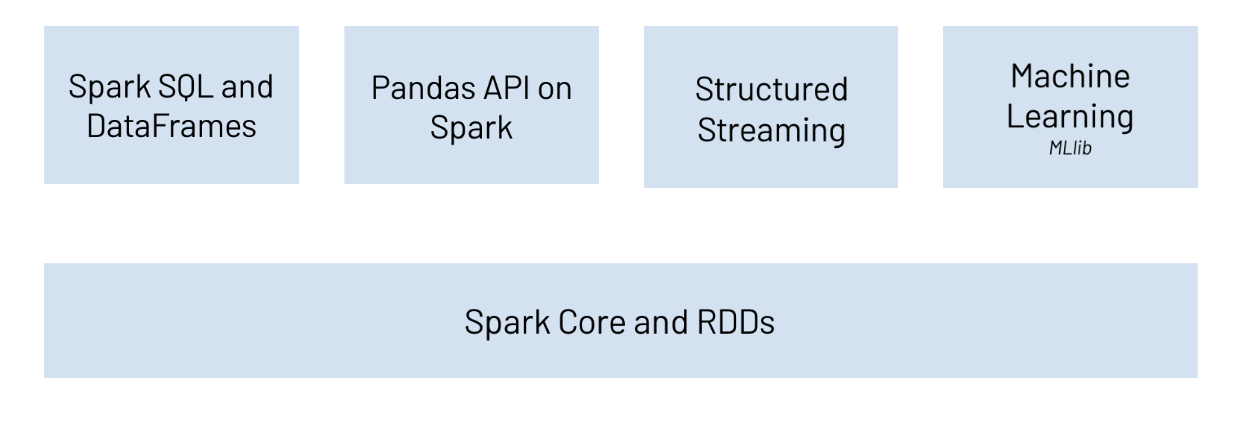

In [6]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Spark applications run as independent sets of processes on a cluster, coordinated by the SparkContext object in your main program (called the driver program).

Specifically, to run on a cluster, the SparkContext can connect to several types of cluster managers (either Spark’s own standalone cluster manager, Mesos, YARN or Kubernetes), which allocate resources across applications. Once connected, Spark acquires executors on nodes in the cluster, which are processes that run computations and store data for your application. Next, it sends your application code (defined by JAR or Python files passed to SparkContext) to the executors. Finally, SparkContext sends tasks to the executors to run.

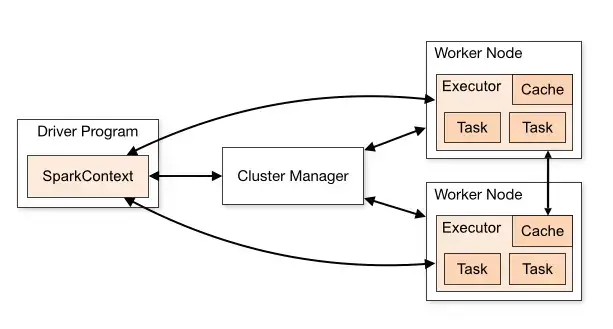

Run Spark locally with one worker thread (that is, no parallelism)

In [7]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

conf = (SparkConf().setAppName("intensity_example").setMaster('local'))
#Run Spark locally with K worker threads. (Ideally, set this to the number of cores on your host.):
#conf = (SparkConf().setAppName("intensity_example").setMaster('local[k]').set('spark.driver.memory', '1G'))
#Run using a YARN cluster manage:
#conf = (SparkConf().setAppName("intensity_example").setMaster('yarn').set('spark.driver.memory', '1G'))


sc = SparkContext(conf=conf)
spark = SparkSession(sc)

#spark = SparkSession.builder.appName("PythonWordCount").getOrCreate()
#spark = SparkSession.builder.master("local[1]").appName('SparkByExamples.com').getOrCreate()


Define the instructions that will return the wordcount results for the text in Hello.txt

In [5]:
import re
from operator import add

#il faut realiser le lab1 et reciperer l'adresse du serveur
lines = spark.read.text("hello.txt").rdd.map(lambda r: r[0].lower())
counts = lines.flatMap(lambda x: re.split(r'[_:-;,.\s]\s*|\'|’|“|"|\s+|(|) ', x)).map(lambda x: (x, 1)).reduceByKey(add)
output = counts.collect()
for (word, count) in output:
  print("%s: %i" % (word, count))

spark.stop()

: 7
None: 1051
let: 3
1: 783
-: 1
23: 1
afghanistan: 1
all: 3
america: 3
5: 9
s: 11
2: 117
3: 43
american: 2
americans: 2
and: 2
6: 8
arlington: 1
as: 2
at: 2
bush: 1
but: 2
christians: 1
concord: 1
domestic: 1
earth: 3
fathers: 1
for: 2
8: 7
forty-four: 1
founding: 2
gettysburg: 1
god: 2
god-given: 1
gross: 1
guided: 1
hindus: 1
homes: 1
i: 1
in: 2
instead: 1
iraq: 1
it: 3
4: 21
its: 2
jews: 1
khe: 1
less: 3
muslim: 1
muslims: 1
my: 2
nor: 2
normandy: 1
now: 2
on: 2
our: 2
9: 6
people: 4
president: 1
product: 1
rather: 2
recall: 1
sahn: 1
scripture: 1
so: 2
starting: 1
states: 1
thank: 2
that: 4
the: 2
their: 2
these: 2
they: 2
this: 3
those: 2
time: 3
to: 2
today: 4
united: 2
we: 3
12: 3
west: 2
what: 2
where: 2
with: 2
yet: 2
[it]: 1
a: 1
48: 1
abandoned: 1
ability: 1
accept: 1
account: 1
achieve: 1
across: 1
act: 1
action: 1
advance: 1
advancing: 1
adversaries: 1
afford: 2
again: 1
against: 1
age: 1
ages: 1
ago: 1
aims: 1
alarmed: 1
7: 5
alliances: 1
alone: 1
alongside: 1
already: 

#II.   Spark Streaming (DStreams)


Spark Streaming is an extension of the core Spark API that enables scalable, high-throughput, fault-tolerant stream processing of live data streams. Data can be ingested from many sources like Kafka, Kinesis, or TCP sockets, and can be processed using complex algorithms expressed with high-level functions like map, reduce, join and window. Finally, processed data can be pushed out to filesystems, databases, and live dashboards. In fact, you can apply Spark’s machine learning and graph processing algorithms on data streams.

park Streaming is the previous generation of Spark’s streaming engine. There are no longer updates to Spark Streaming and it’s a legacy project. There is a newer and easier to use streaming engine in Spark called Structured Streaming. You should use Spark Structured Streaming for your streaming applications and pipelines. **See Structured Streaming Programming Guide**.


Below is a basic example of using spark streaming to retrieve data sent over the network via a socket managed by a python server



In [8]:
!python spark.py & python server.py &


########
#Server#
########
# from pyspark import SparkContext
# from pyspark.streaming import StreamingContext
# import time
# import socket

# server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# server.setsockopt(socket.IPPROTO_TCP, socket.TCP_NODELAY, 1)
# server.bind(('localhost', 1201))

# server.listen()

# client, address = server.accept()
# print("new connection from: "+ str(address))
# client.sendall("first lab on apache spark\n".encode())
# time.sleep(10)
# client.sendall("apache spark can be used without apache hadoop\n".encode())
# time.sleep(10)
# client.sendall(" end of spark client\n".encode())
# time.sleep(10)
# #client.close()


##############
#Spark client#
##############
# from multiprocessing import Process
# from multiprocessing import Pool

# from pyspark import SparkContext
# from pyspark.streaming import StreamingContext
# import time
# import socket


# # Create a local StreamingContext with two working thread and batch interval of 1 second
# sc = SparkContext("local[2]", "NetworkWordCount")
# ssc = StreamingContext(sc, 10)
# # Create a DStream that will connect to hostname:port, like localhost:9999
# lines = ssc.socketTextStream("localhost", 1201)
# # Split each line into words
# words = lines.flatMap(lambda line: line.split(" "))
# # Count each word in each batch
# pairs = words.map(lambda word: (word, 1))
# wordCounts = pairs.reduceByKey(lambda x, y: x + y)
# # Print the first ten elements of each RDD generated in this DStream to the console
# wordCounts.pprint()
# ssc.start()             # Start the computation
# ssc.awaitTermination()  # Wait for the computation to terminate



python3: can't open file '/content/server.py': [Errno 2] No such file or directory
python3: can't open file '/content/spark.py': [Errno 2] No such file or directory


#III.   Structured Streaming (DataFrame)

Structured Streaming is a scalable and fault-tolerant stream processing engine built on the Spark SQL engine. You can express your streaming computation the same way you would express a batch computation on static data. The Spark SQL engine will take care of running it incrementally and continuously and updating the final result as streaming data continues to arrive. You can use the Dataset/DataFrame API in Scala, Java, Python or R to express streaming aggregations, event-time windows, stream-to-batch joins, etc. The computation is executed on the same optimized Spark SQL engine. Finally, the system ensures end-to-end exactly-once fault-tolerance guarantees through checkpointing and Write-Ahead Logs. In short, Structured Streaming provides fast, scalable, fault-tolerant, end-to-end exactly-once stream processing without the user having to reason about streaming.

Below is a basic example of using spark structured streaming to retrieve data sent over the network via a socket managed by a python server. The result of the processing is regenerated for all data recived from the begining of the communication between the server and the client (unlike spark streaming which does the procession just for the new recived record)

In [9]:
!python spark.py & python server.py &

#########
#Spark#
#######
# from pyspark.sql import SparkSession
# from pyspark.sql.functions import explode
# from pyspark.sql.functions import split
# import time
# import socket
# print('Start Spark Streaming ...')
# spark = SparkSession\
#     .builder\
#     .appName("StructuredNetworkWordCount")\
#     .getOrCreate()

# # Create DataFrame representing the stream of input lines from connection to host:port
# lines = spark\
#     .readStream\
#     .format('socket')\
#     .option('host', "localhost")\
#     .option('port', 4523)\
#     .load()

# # Split the lines into words
# words = lines.select(
#     # explode turns each item in an array into a separate row
#     explode(
#         split(lines.value, ' ')
#     ).alias('word')
# )

# # Generate running word count
# wordCounts = words.groupBy('word').count()

# # Start running the query that prints the running counts to the console
# query = wordCounts\
#     .writeStream\
#     .outputMode('complete')\
#     .format('console')\
#     .start()

# query.awaitTermination()


########
#Server#
########
# from pyspark import SparkContext
# from pyspark.streaming import StreamingContext
# import time
# import socket


# server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# server.setsockopt(socket.IPPROTO_TCP, socket.TCP_NODELAY, 1)
# server.bind(('localhost', 4523))

# server.listen()

# client, address = server.accept()
# print("new connection from: "+ str(address))
# client.sendall("first lab on apache spark\n".encode())
# print("sending...")
# time.sleep(30)
# print("ok...")
# client.sendall("apache spark can be used without apache hadoop\n".encode())
# print("sending...")
# time.sleep(30)
# print("ok...")
# client.sendall(" end of spark client\n ".encode())
# print("sending...")
# time.sleep(30)
# print("ok...")
# #client.close()


python3: can't open file '/content/server.py': [Errno 2] No such file or directory
python3: can't open file '/content/spark.py': [Errno 2] No such file or directory


#IV. Application: Realtime Processing of News

##IV.1. Data collection

###*1.   Google News API*




In [10]:
#https://pypi.org/project/GoogleNews
!pip install GoogleNews
!pip install newspaper3k


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 5.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13541 sha256=9e997e509b6633b8a7c96201bc37e49ff771d883f376ef00a14842bb14a7a337
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d

In [11]:
'''
Good API for getting News from several data sources
here is a search limit on the number of news in this api.
The maximum number of news we can gather is 10
Documentations:https://medium.com/analytics-vidhya/googlenews-api-live-news-from-google-news-using-python-b50272f0a8f0
'''

from GoogleNews import GoogleNews
from newspaper import Article
import pandas as pd

#get new for a given date range
#googlenews=GoogleNews(start='05/01/2020',end='05/31/2020')

#get new for previous days
#googlenews=GoogleNews(period='7d')

#get new for previous hourses
#googlenews=GoogleNews(period='1h')

#get new for previous minutes
googlenews=GoogleNews(period='30min')

#Search for news about specific topic
googlenews.search('covid')

#get Result
result=googlenews.result()

#print results
df=pd.DataFrame(result)
print(df.head())

                                               title            media  \
0  70-year-old man arrested for fraudulently obta...             KTLA   
1  Community Memorial updates COVID vaccination r...  Oneida Dispatch   
2  Video emerges of Conservative HQ Christmas par...     The Guardian   
3  Partygate: Conservative Party staff filmed dri...         Sky News   
4  Himes: Despite new info, ‘we may never know’ C...       NewsNation   

         date                   datetime  \
0  1 mins ago 2023-06-17 21:40:36.659472   
1  1 mins ago 2023-06-17 21:40:36.663016   
2  1 hour ago 2023-06-17 20:41:40.413480   
3  1 hour ago 2023-06-17 20:41:40.438660   
4  1 hour ago 2023-06-17 20:41:40.460326   

                                                desc  \
0  A man from Marina del Ray was arrested after a...   
1  Subscribers are entitled to 10 gift sharing ar...   
2  Footage shows members of staff drinking alcoho...   
3  New footage, obtained by The Mirror, shows Tor...   
4  Rep. Jim Hime

In [12]:
df = df['desc']
for row in df:
    print("Sending:", row)

Sending: A man from Marina del Ray was arrested after allegedly obtaining $3 million in COVID-19 era business loans fraudulently, the U.S. Attorney's Office...
Sending: Subscribers are entitled to 10 gift sharing articles each month. These can be shared with friends and family who are not subscribers.
Sending: Footage shows members of staff drinking alcohol and dancing at the gathering on 14 December 2020.
Sending: New footage, obtained by The Mirror, shows Tory Party staff at a Christmas party dancing, drinking and joking about Covid restrictions while lockdown rules...
Sending: Rep. Jim Himes discusses a deadline the Biden administration faces to declassify all information on the possible leak of COVID-19 from the Wuhan lab.
Sending: UCSF infectious disease specialist Michael Peluso, MD, who co-leads one of the world's oldest studies of long COVID, discusses the condition's mysteries.
Sending: Advisors to the FDA recommend updating the covid vaccines. They are aiming to target a circ

###*2.   NewsAPI*

In [13]:
#https://newsapi.org/
!pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
'''
Good API for getting News from several data sources
not suitable for realtime news.
Documentations:https://github.com/mattlisiv/newsapi-python
'''
#Usage
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='8308c1e8b30640468c1be43719b78124')

# top-headlines
# top_headlines = newsapi.get_top_headlines(q='bitcoin',
#                                           sources='bbc-news,the-verge',
#                                           category='business',
#                                           language='en',
#                                           country='us')

# top-headlines/sources
# sources = newsapi.get_sources()


# Everything
all_articles = newsapi.get_everything(q='erdogan',
                                      from_param='2023-05-29',
                                      to='2023-05-30',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)
print(all_articles)


{'status': 'ok', 'totalResults': 439, 'articles': [{'source': {'id': 'cnn', 'name': 'CNN'}, 'author': 'Nadeen Ebrahim', 'title': "Erdogan survived the biggest test of his political career. What's next?", 'description': "President Recep Tayyip Erdogan on Sunday emerged as winner of the country's presidential election, proving himself resilient against the opposition bloc as he extends his rule into a third decade.", 'url': 'https://www.cnn.com/2023/05/29/middleeast/turkey-election-erdogan-what-is-next-mime-intl/index.html', 'urlToImage': 'https://media.cnn.com/api/v1/images/stellar/prod/230529101715-01-erdogan-runoff-victory-052923.jpg?c=16x9&q=w_800,c_fill', 'publishedAt': '2023-05-29T13:02:47Z', 'content': 'Editors Note: A version of this story appears in CNNs Meanwhile in the Middle East newsletter, a three-times-a-week look inside the regions biggest stories. Sign up here.\r\nPresident Recep Tayyip Erdo… [+6642 chars]'}, {'source': {'id': None, 'name': 'DW (English)'}, 'author': 'El

##IV.2. Data analysis



*   Choose a subject (erdogan, covid, ......)
*   Retrieve news periodically (frequency to be defined for each source)
*   Give the most dominating feeling or the most dominant topic in each news
*   show trends in subject using pandas


In [18]:
!python spark_chelsea.py & python server_chelsea.py &

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/17 22:12:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/06/17 22:12:17 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/06/17 22:12:20 WARN TextSocketSourceProvider: The socket source should not be used for production applications! It does not support recovery.
23/06/17 22:12:23 WARN ResolveWriteToStream: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-095654d7-0dba-45eb-897f-2e8d8834dea8. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.
23/06/17 22:12:23 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in stream

KeyboardInterrupt: ignored

In the previous code of wordcounts, we performed the necessary aggregations using groupBy and count operations on the streaming DataFrame words. Then, we write the results to the console using the "Complete" output mode.

Please note that the "Complete" output mode can only be used when we have aggregations present in the query. If we want to output the individual rows of the streaming DataFrame without aggregations which is the case for our data, we used the "Append" output mode instead.